In [97]:
import csv
import numpy as np
from io import StringIO
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
data=pd.read_csv('Voice4PD.csv',sep=';',decimal=',',skiprows=1,usecols=[1,2,3,4,5],names=["Classe","Atonie","Debit","Irreg","Puissance"])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [150]:
print(data.head())

  Classe  Atonie  Debit  Irreg  Puissance
0     HC    2.64   0.73   0.70       0.37
1     HC    0.58   0.55   1.41       1.29
2     HC    1.88   0.73   0.61       1.42
3     HC    0.58   1.53   0.64       1.66
4     HC    1.58   0.73   0.96       0.58


In [151]:
print(data.shape)

(113, 5)


In [202]:
data['Classe']=pd.Categorical(data["Classe"], ordered=False)
print(data.dtypes)

Classe       category
Atonie        float64
Debit         float64
Irreg         float64
Puissance     float64
dtype: object


In [182]:
print(data['Classe'].value_counts())

HC     38
PD     35
MSA    28
PSP    12
Name: Classe, dtype: int64


In [183]:
#print(data.loc[data['Classe']=="MSA",:])

In [205]:

data['Classe']=data['Classe'].cat.rename_categories([0,1,2,3])
""" 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP"""


' 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP'

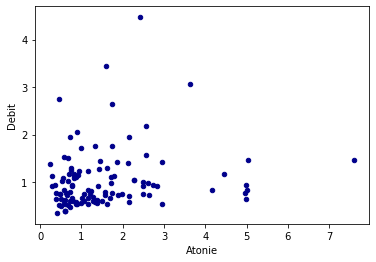

In [206]:
data.plot.scatter(x='Atonie', y='Debit', color='DarkBlue')


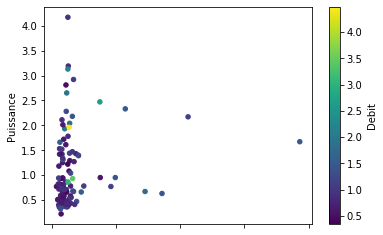

In [207]:
data.plot.scatter(x='Irreg', y='Puissance',c='Debit',colormap='viridis')

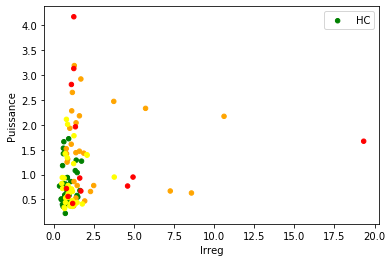

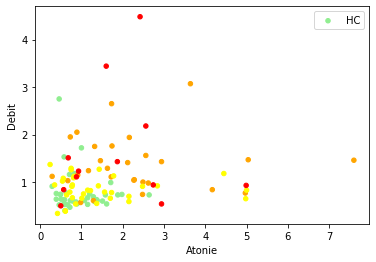

In [208]:
data.plot.scatter(x='Irreg', y='Puissance',
                  c=pd.Series(['green','orange','yellow','red'])[y2],label='HC')

data.plot.scatter(x='Atonie', y='Debit',
                  c=pd.Series(['LightGreen','orange','yellow','red'])[y2],label='HC')

In [209]:
data_train,data_test= train_test_split(data, test_size=0.33)

#print(data_train.shape)
#print(data_test.shape)

In [211]:
lda = LinearDiscriminantAnalysis()

x_train=data_train[['Atonie','Debit','Puissance','Irreg']]
x_test=data_test[['Atonie','Debit','Puissance','Irreg']]

classe_test=data_test['Classe']
print(classe_test)

classe_train=data_train['Classe']
print(classe_train)

20     0
56     1
65     1
80     2
110    3
13     0
70     2
104    3
6      0
75     2
17     0
58     1
86     2
103    3
71     2
47     1
8      0
97     2
72     2
100    2
14     0
7      0
22     0
73     2
79     2
1      0
31     0
45     1
57     1
32     0
23     0
34     0
109    3
54     1
46     1
53     1
66     2
3      0
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]
28     0
55     1
35     0
29     0
112    3
      ..
61     1
18     0
74     2
27     0
107    3
Name: Classe, Length: 75, dtype: category
Categories (4, int64): [0, 1, 2, 3]


[0.91487051 0.08230563 0.00282386]


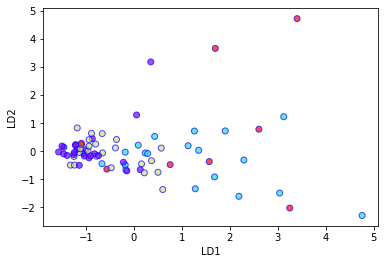

In [214]:
X_lda = lda.fit_transform(x_train, classe_train)
print(lda.explained_variance_ratio_)

#data as a function of the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


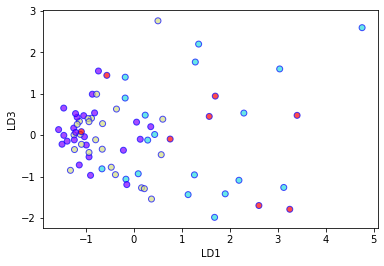

In [215]:
plt.xlabel('LD1')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

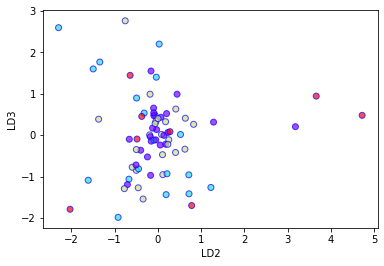

In [216]:
plt.xlabel('LD2')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [227]:
predict_classe=[]
for i in range(x_test.shape[0]):
    predict_classe.append(lda.predict([x_test.iloc[i,:]])[0])

print(predict_classe)
print(classe_test)

[0, 3, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 3, 2, 1, 0, 2]
20     0
56     1
65     1
80     2
110    3
13     0
70     2
104    3
6      0
75     2
17     0
58     1
86     2
103    3
71     2
47     1
8      0
97     2
72     2
100    2
14     0
7      0
22     0
73     2
79     2
1      0
31     0
45     1
57     1
32     0
23     0
34     0
109    3
54     1
46     1
53     1
66     2
3      0
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]
